### Observations for the Pyber dataset

- Ride-sharing is a lot more popular in urban areas, where people are less likely to own a car or want to take public transportation.
- The average fare for the Rural and Suburban riders was higher than in the Urban city.  This is likely because Urban riders travel a smaller distance than those in sparsely populated areas.
- While the total % of fares and rides were similar for Urban areas, the total number of drivers was much higher in those urban areas. The quantity of urban ride shares out-weighed their lower fare values.

In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to Load 
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

In [3]:
city_data_to_load["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [4]:
# Read the City and Ride Data

# Combine the data into a single dataset
city_ride_df = pd.merge(city_data_to_load, ride_data_to_load, how='outer')

# Display the data table for preview
city_ride_df.describe()

,driver_count,fare,ride_id
count,2375.000000,2375.000000,2.375000e+03
mean,28.930105,26.753112,4.887270e+12
std,20.666306,12.109465,2.907361e+12
min,1.000000,4.050000,3.218337e+08
25%,11.000000,17.190000,2.381175e+12
50%,23.000000,26.600000,4.748541e+12
75%,45.000000,36.645000,7.461936e+12
max,73.000000,58.550000,9.991538e+12


In [5]:
city_ride_df["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [6]:
# Group by City
# Create the following variables for the first part:
# total $$ per city, total number of rides per city, total number of drivers per city, city type,


In [7]:
# group by the city...
city_group_df = city_ride_df.groupby("city")

#glance at the grouped data...
city_group_df["driver_count"].value_counts()

city                  driver_count
Amandaburgh           12              18
Barajasview           26              22
Barronchester         11              16
Bethanyland           22              18
Bradshawfurt          7               10
Brandonfort           10              19
Carriemouth           52              27
Christopherfurt       41              27
Colemanland           23              22
Davidfurt             23              17
Deanville             49              19
East Aaronbury        7                9
East Danielview       22              17
East Kaylahaven       65              29
East Kentstad         20              13
East Marymouth        5               27
Erikaland             37              12
Garzaport             7                3
Grahamburgh           61              25
Grayville             2               15
Harringtonfort        4                6
Huntermouth           37              24
Hurleymouth           36              28
Jerryton              

In [8]:
# variables: total $$ per city, total fare per city, total number of rides per city, total number of drivers per city, city type

#total fare (will help calcs)
city_total_fare = city_group_df["fare"].sum()

#total number of fares per city
city_num_fare = city_group_df["fare"].count()

# total number of rides per city
city_total_rides = city_group_df["city"].count()

# total number of drivers per city
city_total_driver = city_group_df["driver_count"].sum()

# average fare per city
city_ave_fare = city_group_df["fare"].mean()

# The type of each city
city_type = city_ride_df.drop_duplicates(subset="city")

In [9]:
#now clean up the city_type dataframe so it can be merged with others...
city_type.drop(["driver_count", "date", "fare", "ride_id"], axis = 1, inplace=True)


C:\Users\matth\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
city_type.head()

,city,type
0,Richardfort,Urban
28,Williamsstad,Urban
51,Port Angela,Urban
70,Rodneyfort,Urban
93,West Robert,Urban


In [11]:
#now make each stat a dataframe so we can merge...
num_fare_df = pd.DataFrame(city_num_fare)
num_rides_df = pd.DataFrame(city_total_rides)
num_drivers_df = pd.DataFrame(city_total_driver)
ave_fare_df = pd.DataFrame(city_ave_fare)


In [12]:
num_rides_df.rename(columns={"city":"rides"}, inplace=True)

In [13]:
#reset the index for the data frames so we can merge
num_fare_df.reset_index(inplace = True)
num_rides_df.reset_index(inplace = True)
num_drivers_df.reset_index(inplace = True)
ave_fare_df.reset_index(inplace = True)


In [14]:
#now merge the dataframes to the "city_type" df based on city
city_ride_stats = pd.merge(pd.merge(pd.merge(pd.merge(city_type, num_fare_df, on="city"), num_rides_df, on="city"), num_drivers_df, on="city"), ave_fare_df, on="city")
city_ride_stats.head()

,city,type,fare_x,rides,driver_count,fare_y
0,Richardfort,Urban,28,28,1064,22.373214
1,Williamsstad,Urban,23,23,1357,24.362174
2,Port Angela,Urban,19,19,1273,23.836842
3,Rodneyfort,Urban,23,23,782,28.616957
4,West Robert,Urban,31,31,1209,25.123871


In [15]:
#now drop the extra fare column and rename the average fare value
city_ride2_df = city_ride_stats.rename(columns={"fare_y":"average_fare"})
city_ride2_df.drop(["fare_x"], axis = 1, inplace=True)

In [16]:
df_urban = city_ride2_df.loc[(city_ride2_df["type"] == "Urban")]
df_suburban = city_ride2_df.loc[(city_ride2_df["type"] == "Suburban")]
df_rural = city_ride2_df.loc[(city_ride2_df["type"] == "Rural")]

## Bubble Plot of Ride Sharing Data

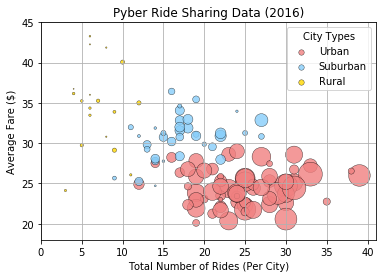

<Figure size 432x288 with 0 Axes>

In [79]:
#plt.scatter(city_num_fare, city_ave_fare, marker = "o", edgecolors="black", s=city_total_driver/2, alpha=0.5)

#fig_urban, = plt.scatter(df_urban.rides, df_urban.average_fare, s=df_urban.driver_count/2, alpha=0.5, marker = 'o', edgecolors="black", c="blue", label = "Urban")

#fig_suburban, = plt.scatter(df_suburban.rides, df_suburban.average_fare, s=df_suburban.driver_count/2, alpha=0.5, marker = 'o', edgecolors="black", c="sky blue", label = "Suburban")

#plt.legend(handles=[fig_urban, fig_suburban], loc="best")
#plt.show()

ax = df_urban.plot(kind='scatter', x="rides", y="average_fare", edgecolors = "Black", linewidths = 0.4, color="LightCoral", s=df_urban["driver_count"]/4, alpha=0.8, label="Urban");

df_suburban.plot(kind='scatter', x="rides", y="average_fare", edgecolors = "Black", linewidths = 0.4, color="LightSkyBlue", s=df_suburban["driver_count"]/4, alpha=0.8, label="Suburban", ax=ax);

df_rural.plot(kind='scatter', x="rides", y="average_fare", edgecolors = "Black", linewidths = 0.4, color="Gold", s=df_rural["driver_count"]/4, alpha=0.8, label="Rural", ax=ax);

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(axis = "both")
lgnd = plt.legend(loc="upper right", scatterpoints=1, title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.ylim(18,45)
plt.xlim(0,41)

plt.show()
# Save Figure
plt.savefig("../Images/BubbleCityType.png")

## Total Fares by City Type

In [20]:
#to get this, follow the initial steps to get group data, and then break out for fares, rides, and drivers.
#group by city type. then get sum of fares for each (later rides & drivers)

In [21]:
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [25]:
#first get total overall numbers for calculations
total_fare = city_ride_df["fare"].sum()
total_ride = city_ride_df["ride_id"].count()
total_drivers = city_ride_df["driver_count"].sum()
total_ride

2375

In [28]:
#group the cities by their type and then calc the different fares variables
type_group = city_ride_df.groupby("type")
type_fare = type_group["fare"].sum()
type_fare_df = pd.DataFrame(type_fare)

In [30]:
#get the percentages for the pie chart
pct_fare = type_fare_df["fare"]/total_fare
type_fare_df["Pct_total_fares"] = pct_fare
type_fare_df


,fare,Pct_total_fares
type,,
Rural,4327.93,0.068115
Suburban,19356.33,0.304639
Urban,39854.38,0.627246


In [40]:
#make new index so city type can be used...
type_fare_df.reset_index(inplace=True)


In [45]:
type_fare_df.rename(columns={"type":"City Type"}, inplace=True)

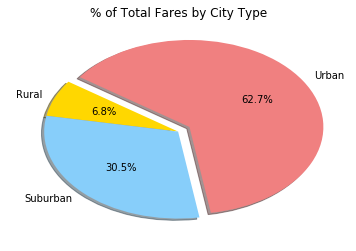

In [68]:
# Calculate Type Percents

# Build Pie Chart
fare_pie = type_fare_df.plot(kind="pie", y="Pct_total_fares", title="% of Total Fares by City Type", labels=["Rural", "Suburban", "Urban"],
                             colors=["gold", "lightskyblue", "lightcoral"], autopct="%2.1f%%", explode = [0, 0, 0.1], shadow=True, startangle=145, legend=False)
fare_pie.set_ylabel('')

# Save Figure
plt.savefig("../Images/FareCityType.png")

## Total Rides by City Type

In [70]:
#calc the rides variable
type_rides = type_group["ride_id"].count()
type_rides_df = pd.DataFrame(type_rides)

In [71]:
#get the percentages for the pie chart
pct_rides = type_rides_df["ride_id"]/total_ride
type_rides_df["Pct_total_rides"] = pct_rides
type_rides_df

,ride_id,Pct_total_rides
type,,
Rural,125,0.052632
Suburban,625,0.263158
Urban,1625,0.684211


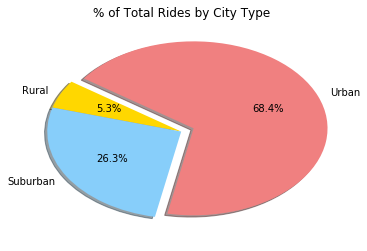

In [73]:
#rider pie chart
ride_pie = type_rides_df.plot(kind="pie", y="Pct_total_rides", title="% of Total Rides by City Type", labels=["Rural", "Suburban", "Urban"],
                             colors=["gold", "lightskyblue", "lightcoral"], autopct="%2.1f%%", explode = [0, 0, 0.1], shadow=True, startangle=145, legend=False)
ride_pie.set_ylabel('')

# Save Figure
plt.savefig("../Images/RideCityType.png")


## Total Drivers by City Type

In [34]:
#calc the drivers variable
type_driver = type_group["driver_count"].sum()
type_driver_df = pd.DataFrame(type_driver)

In [35]:
#get the percentages for the pie chart
pct_driver = type_driver_df["driver_count"]/total_drivers
type_driver_df["Pct_total_drivers"] = pct_driver
type_driver_df

,driver_count,Pct_total_drivers
type,,
Rural,537,0.007816
Suburban,8570,0.124729
Urban,59602,0.867456


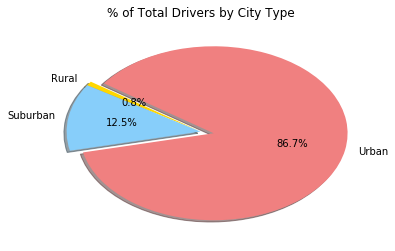

In [76]:
#driver pie chart
driver_pie = type_driver_df.plot(kind="pie", y="Pct_total_drivers", title="% of Total Drivers by City Type", labels=["Rural", "Suburban", "Urban"],
                             colors=["gold", "lightskyblue", "lightcoral"], autopct="%2.1f%%", explode = [0, 0, 0.1], shadow=True, startangle=145, legend=False)
driver_pie.set_ylabel('')

# Save Figure
plt.savefig("../Images/DriverCityType.png")